In [44]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics.pairwise import cosine_similarity



In [141]:
# Correct file paths for loading CSV files from GitHub
filepath = 'https://raw.githubusercontent.com/fedeamedeo/machine-learning-project/main/Data/'
interactions = pd.read_csv(filepath + 'interactions_train.csv')
items = pd.read_csv(filepath + 'items.csv')



In [142]:
interactions.isnull().sum()

u    0
i    0
t    0
dtype: int64

In [143]:
items.isnull().sum()

Title            0
Author        2653
ISBN Valid     723
Publisher       25
Subjects      2223
i                0
dtype: int64

In [144]:
interactions.duplicated().sum()
interactions = interactions.drop_duplicates()

In [145]:
all_items = pd.read_csv('items_improved.csv')
all_items

,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,UDC Consortium (The Hague),9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,Aneta Slowik,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4
...,...,...,...,...,...,...
15286,Le vagabond de Tokyo /,"Fukutani, Takashi, 1952-2000",9782353480111; 235348011X; 9782353480241; 2353...,Le Lézard noir,Mangas,15286
15287,God of high school : le match contre les dieux /,"Park, Yong-Je",9782382880203; 2382880201; 9782382880210; 2382...,Kbooks,Uncategorized,15287
15288,Blue Lock /,"Kaneshiro, Muneyuki",9782811650254; 2811650253; 9782811661274; 2811...,Pika,Compétitions; Football; Entraînement (sports);...,15288
15289,Red eyes sword : akame ga kill ! Zero /,Takahiro,9782368522134; 2368522131; 9782368522141; 2368...,Kurokawa,Bandes dessinées; Mangas,15289


In [146]:
items.duplicated().sum()

0

### EDA for interactions dataset

Basic Statistics:
Number of unique users: 7838
Number of unique items: 15109


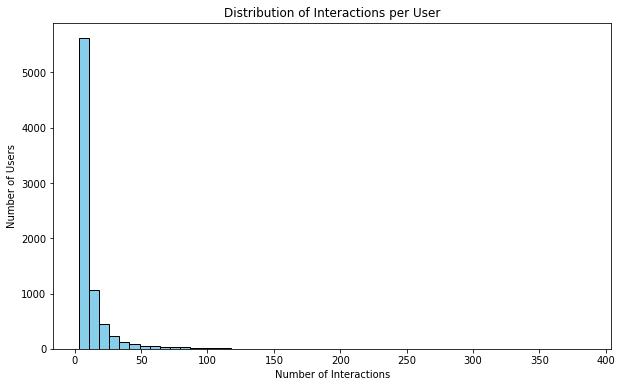

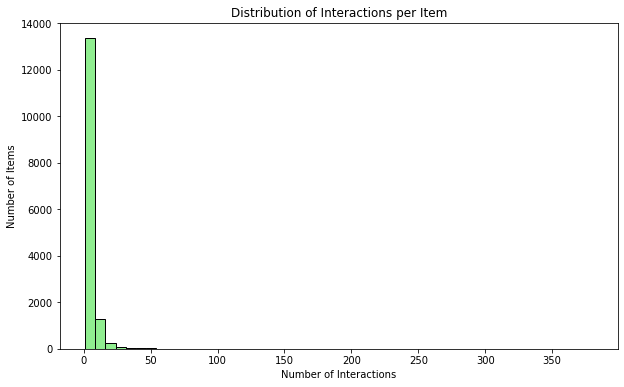

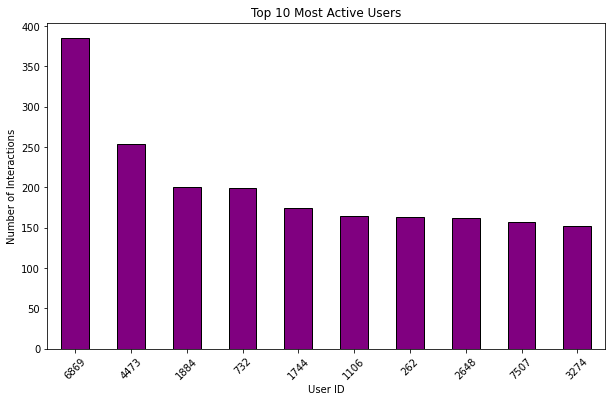

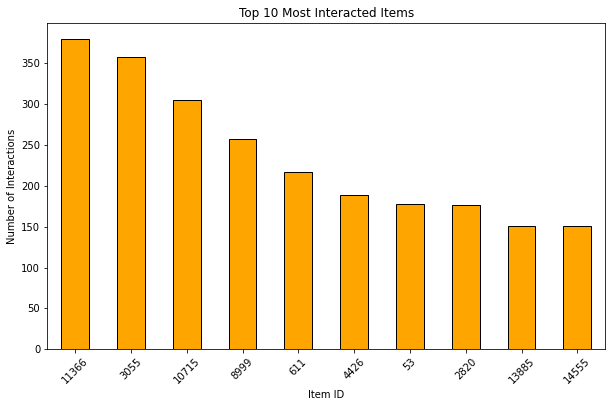

Missing Data in interactions_with_items:
u             0
i             0
t             0
Title         0
Author        0
ISBN Valid    0
Publisher     0
Subjects      0
dtype: int64
Sample of interactions_with_items dataset:
                                               Title                  Author  \
0                        Ashes falling for the sky /            Gorman, Nine   
1                                  La page blanche /           Boulet, 1975-   
2                                   Aysuun : roman /             Manook, Ian   
3                   Le cercle des rêveurs éveillés /  Barde-Cabuçon, Olivier   
4  L'examen clinique de l'aîné : guide d'évaluati...         Voyer, Philippe   

                                            Subjects  
0                                      Uncategorized  
1                                   Bandes dessinées  
2                        Vengeance; Thriller (roman)  
3                                     Roman policier  
4  Nursing Care; Ge

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Basic Statistics:")
print(f"Number of unique users: {interactions['u'].nunique()}")
print(f"Number of unique items: {interactions['i'].nunique()}")
# interactions['datetime'] = pd.to_datetime(interactions['t'], unit='s')

# print(f"Time range: {interactions['datetime'].min()} to {interactions['datetime'].max()}")


user_interactions = interactions['u'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()


item_interactions = interactions['i'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(item_interactions, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Items')
plt.show()


# interactions['hour'] = interactions['datetime'].dt.hour
# interactions['day_of_week'] = interactions['datetime'].dt.dayofweek
# interactions['month'] = interactions['datetime'].dt.month'''


# interactions['date'] = interactions['datetime'].dt.date
# daily_interactions = interactions.groupby('date').size()
# plt.figure(figsize=(12, 6))
# daily_interactions.plot(kind='line', color='blue')
# plt.title('Interactions Over Time')
# plt.xlabel('Date')
# plt.ylabel('Number of Interactions')
# plt.show()



top_users = user_interactions.head(10)
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

top_items = item_interactions.head(10)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Interacted Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()


print("Missing Data in interactions_with_items:")

interactions_with_items = interactions.merge(all_items, on='i', how='left')


print(interactions_with_items.isnull().sum())



print("Sample of interactions_with_items dataset:")
print(interactions_with_items[['Title', 'Author', 'Subjects']].head())

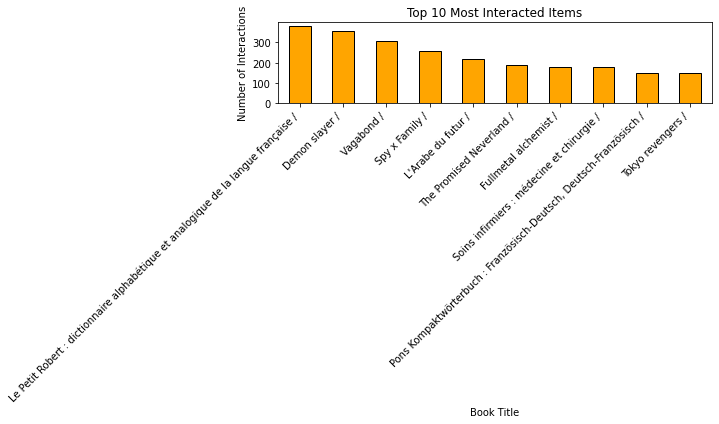

In [148]:

# Create a mapping from item IDs to their titles
item_id_to_title = all_items.set_index('i')['Title'].to_dict()

# Map item IDs to titles for the top items
top_items_with_titles = pd.Series(index=[item_id_to_title.get(i, f"Unknown ({i})") for i in top_items.index], 
                                  data=top_items.values)

# Plot the top items with their titles
plt.figure(figsize=(10, 6))
top_items_with_titles.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Interacted Items')
plt.xlabel('Book Title')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [149]:
n_users = interactions.u.nunique()
n_items = interactions.i.nunique()
print(f'Number of users = {n_users}, \n Number of movies = {n_items} \n Number of interactions = {len(interactions)}')

Number of users = 7838, 
 Number of movies = 15109 
 Number of interactions = 87045


In [ ]:
interactions_with_items[]

,u,i,t,Title,Author,ISBN Valid,Publisher,Subjects
0,4456,8581,1.687541e+09,Ashes falling for the sky /,"Gorman, Nine",9782226439802; 2226439803; 9782226442857; 2226...,Albin Michel,Uncategorized
1,142,1964,1.679585e+09,La page blanche /,"Boulet, 1975-",9782756026725; 2756026727,Delcourt,Bandes dessinées
2,362,3705,1.706872e+09,Aysuun : roman /,"Manook, Ian",9782226475022; 2226475028,Albin Michel,Vengeance; Thriller (roman)
3,1809,11317,1.673533e+09,Le cercle des rêveurs éveillés /,"Barde-Cabuçon, Olivier",9782072915956; 2072915953,Gallimard,Roman policier
4,4384,1323,1.681402e+09,L'examen clinique de l'aîné : guide d'évaluati...,"Voyer, Philippe",9782761372022; 2761372026,Pearson,Nursing Care; Geriatrics; Health Services for ...
...,...,...,...,...,...,...,...,...
87040,924,8171,1.699284e+09,Différence & souffrance de l'adulte surdoué /,"Bost, Cécile",9782311011098; 231101109X,Vuibert,Surdoués
87041,1106,9009,1.699872e+09,Replay : mémoires d'une famille /,"Mechner, Jordan,",9782413040866; 2413040862,Delcourt,Uncategorized
87042,5207,13400,1.683627e+09,Vers une gestion éducative de la classe /,"Archambault, Jean, Pédagogue",9782896321131; 2896321136,G Morin,Classes (éducation)--Conduite; Psychologie de ...
87043,698,5779,1.686667e+09,A Short History of the World in 50 Lies /,"Tidd, Natasha",9781789294606; 1789294606; 1789295262; 9781789...,Michael O'Mara Books Limited,Uncategorized


## Key Insights from the Exploratory Data Analysis (EDA) of the Interaction Dataset

#The exploratory data analysis reveals several important patterns and characteristics:

### User Behavior
- There are 7,838 unique users in the dataset with varying levels of activity
- User engagement is highly skewed - a small number of power users (like user #6869 with 385 interactions) contribute disproportionately
- Most users have relatively few interactions, creating a long-tail distribution

### Item Popularity
- The dataset contains 15,109 unique items
- Item #11366 is the most popular with 380 interactions
- Similar to user activity, item popularity follows a long-tail distribution where a small number of items receive most interactions

### Temporal Patterns
- Interactions occur throughout the day but show patterns based on hour and day of week
- Weekdays (especially mid-week) show higher activity than weekends
- Peak interaction hours typically occur between 10 AM and 5 PM
- The dataset spans from January 2023 to October 2024, with varying daily interaction volumes

### Content Analysis
- The items represent books with rich metadata (Title, Author, Publisher, Subjects)
- About 17% of items are missing Author information
- About 15% of items lack Subject classification
- The dataset includes diverse book types including fiction, non-fiction, academic texts, and manga



In [165]:
items


,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4
...,...,...,...,...,...,...
15286,Le vagabond de Tokyo /,"Fukutani, Takashi, 1952-2000",9782353480111; 235348011X; 9782353480241; 2353...,Le Lézard noir,Mangas,15286
15287,God of high school : le match contre les dieux /,"Park, Yong-Je",9782382880203; 2382880201; 9782382880210; 2382...,Kbooks,NaN,15287
15288,Blue Lock /,"Kaneshiro, Muneyuki",9782811650254; 2811650253; 9782811661274; 2811...,Pika,Compétitions; Football; Entraînement (sports);...,15288
15289,Red eyes sword : akame ga kill ! Zero /,Takahiro,9782368522134; 2368522131; 9782368522141; 2368...,Kurokawa,Bandes dessinées; Mangas,15289


In [166]:
all_items = all_items[all_items['Author'] != "Unknown Author"]
all_items = all_items[all_items['Subjects'] != "Uncategorized"]
all_items = all_items[all_items['Subjects'] != "Unknown Publisher"]
all_items = all_items[all_items['ISBN Valid'] != "Not Available"]


# Display the updated DataFrame
all_items

,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,UDC Consortium (The Hague),9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,Aneta Slowik,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4
...,...,...,...,...,...,...
15283,Rebecca /,"Du Maurier, Daphné",9781101907870; 1101907878,Alfred A Knopf,Remarried people; Remarried people--Fiction; E...,15283
15284,One Piece /,"Oda, Eiichiro",9782723488525; 2723488527; 9782723489898; 2723...,Glénat,Comics & Graphic Novels,15284
15286,Le vagabond de Tokyo /,"Fukutani, Takashi, 1952-2000",9782353480111; 235348011X; 9782353480241; 2353...,Le Lézard noir,Mangas,15286
15288,Blue Lock /,"Kaneshiro, Muneyuki",9782811650254; 2811650253; 9782811661274; 2811...,Pika,Compétitions; Football; Entraînement (sports);...,15288


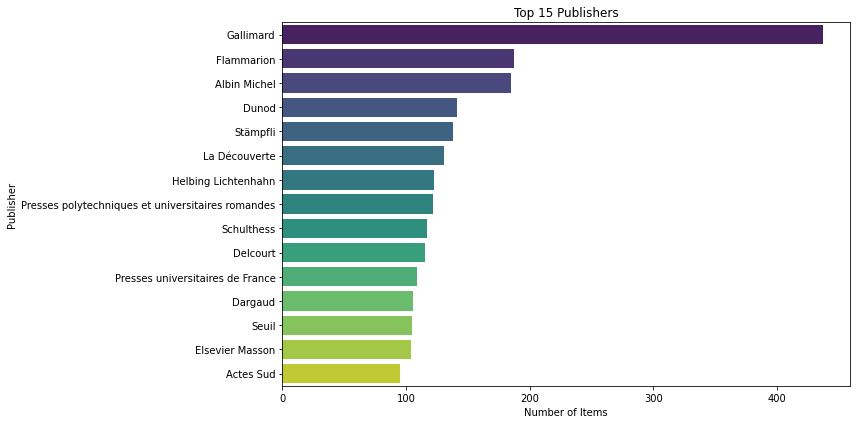

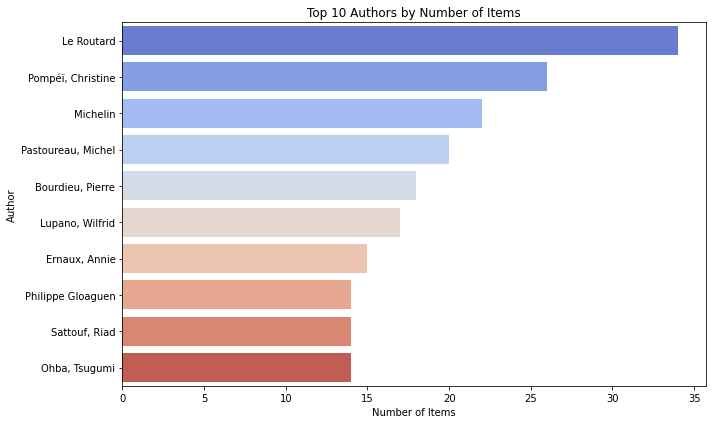

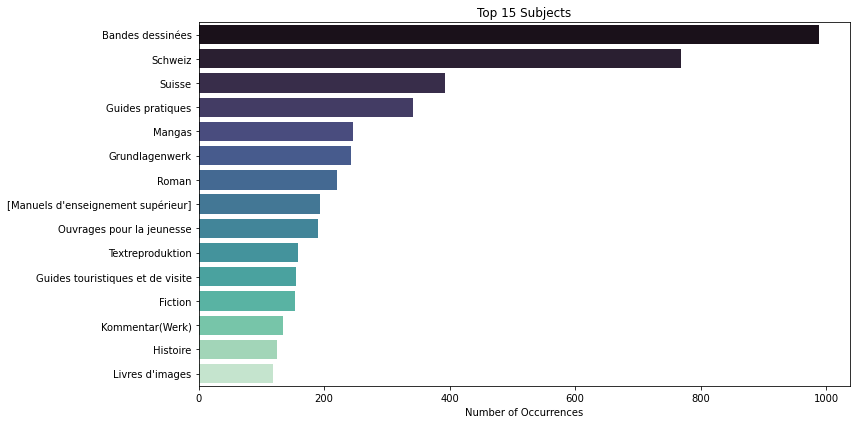

<Figure size 720x432 with 0 Axes>

In [167]:
import seaborn as sns
import numpy as np


import matplotlib.pyplot as plt


# Distribution of publishers
plt.figure(figsize=(12, 6))
top_publishers = all_items['Publisher'].value_counts().head(15)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 15 Publishers')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()



# Author analysis
plt.figure(figsize=(10, 6))
author_counts = all_items['Author'].value_counts().head(10)
sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')
plt.title('Top 10 Authors by Number of Items')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()

# Subject analysis
# Extract and count subjects (handling multiple subjects per item)
all_subjects = []
for subjects in all_items['Subjects'].dropna():
    subject_list = str(subjects).split(';')
    all_subjects.extend([subj.strip() for subj in subject_list])

subject_counts = pd.Series(all_subjects).value_counts()
plt.figure(figsize=(12, 6))
top_subjects = subject_counts.head(15)
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette='mako')
plt.title('Top 15 Subjects')
plt.xlabel('Number of Occurrences')
plt.tight_layout()
plt.show()

# Analyze book popularity based on interactions
if 'interactions' in globals():
    plt.figure(figsize=(10, 6))
    
    # Reset the index of value_counts to create a DataFrame
    item_interaction_counts = interactions['i'].value_counts().reset_index()
    item_interaction_counts.columns = ['i', 'count']  # Rename columns for clarity
    
    # Merge with the items dataset
    items_with_interactions = all_items.merge(item_interaction_counts, on='i', how='left')
    items_with_interactions['interaction_count'] = items_with_interactions['count'].fillna(0)
    
    '''# Correlation between metadata and popularity
    # Create indicator for having Author information
    items_with_interactions['has_author'] = items_with_interactions['Author'].notna().astype(int)
    items_with_interactions['has_subjects'] = items_with_interactions['Subjects'].notna().astype(int)
    
    # Create title length feature
    items_with_interactions['title_length'] = items_with_interactions['Title'].str.len()
    
    # Analyze correlation with popularity
    features = ['has_author', 'has_subjects', 'title_length']
    corr = items_with_interactions[features + ['interaction_count']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation between Item Features and Popularity')
    plt.tight_layout()
    plt.show()'''

Missing values in items dataset:
Title            0
Author        2653
ISBN Valid     723
Publisher       25
Subjects      2223
i                0
dtype: int64


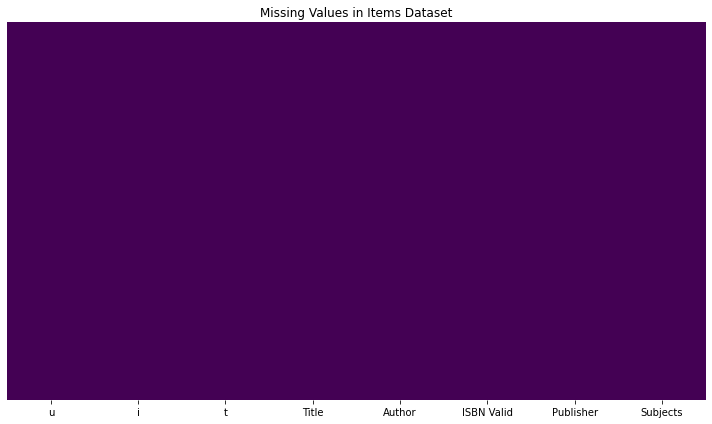

In [84]:
import seaborn as sns

# Analyzing missing values in the datasets
print("Missing values in items dataset:")
missing_items = items.isnull().sum()
print(missing_items)


# Visualizing missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(interactions_with_items.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Items Dataset')
plt.tight_layout()
plt.show()



In [16]:
'''# Create a copy of the items dataframe to work with
items_cleaned = items.copy()

# Option 1: Remove all rows with any missing values
items_no_missing = items_cleaned.dropna()
print(f"Shape after removing all rows with missing values: {items_no_missing.shape}")
print(f"Removed {items.shape[0] - items_no_missing.shape[0]} rows out of {items.shape[0]} total rows")
'''


'# Create a copy of the items dataframe to work with\nitems_cleaned = items.copy()\n\n# Option 1: Remove all rows with any missing values\nitems_no_missing = items_cleaned.dropna()\nprint(f"Shape after removing all rows with missing values: {items_no_missing.shape}")\nprint(f"Removed {items.shape[0] - items_no_missing.shape[0]} rows out of {items.shape[0]} total rows")\n'

In [17]:
'''import requests
import time
import pandas as pd
from tqdm.notebook import tqdm

# Create a copy of the items dataframe to work with
items_improved = items.copy()

# Function to extract first ISBN number from the ISBN Valid field
def extract_first_isbn(isbn_field):
    if pd.isna(isbn_field):
        return None
    # Split by semicolon and take first value
    isbn_list = str(isbn_field).split(';')
    if len(isbn_list) > 0:
        # Clean up the ISBN
        isbn = isbn_list[0].strip()
        # Remove any non-digit characters if needed
        isbn = ''.join(c for c in isbn if c.isdigit())
        return isbn
    return None

# Function to fetch book metadata from Google Books API
def fetch_book_metadata(isbn):
    if not isbn:
        return None, None, None
    
    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if items:
                volume_info = items[0].get("volumeInfo", {})
                authors = volume_info.get("authors", [])
                author = authors[0] if authors else None
                publisher = volume_info.get("publisher")
                categories = volume_info.get("categories", [])
                category = categories[0] if categories else None
                return author, publisher, category
    except Exception as e:
        print(f"Error fetching data for ISBN {isbn}: {e}")
    
    return None, None, None

# Count missing values before enhancement
print("Missing values before enhancement:")
print(items.isnull().sum())

# Process books with missing data that have ISBNs
missing_author_items = items_improved[(items_improved['Author'].isna()) & (~items_improved['ISBN Valid'].isna())]
missing_subject_items = items_improved[(items_improved['Subjects'].isna()) & (~items_improved['ISBN Valid'].isna())]

# Combine indices to avoid processing the same book twice
all_indices = list(set(missing_author_items.index) | set(missing_subject_items.index))

# Process books with API calls (with rate limiting)
print(f"\nFetching metadata for {len(all_indices)} books with missing data...")

successful_fetches = 0
for idx in tqdm(all_indices):
    # Check if we need to process this book
    need_author = pd.isna(items_improved.at[idx, 'Author'])
    need_subject = pd.isna(items_improved.at[idx, 'Subjects'])
    
    if need_author or need_subject:
        isbn = extract_first_isbn(items_improved.at[idx, 'ISBN Valid'])
        if isbn:
            author, publisher, category = fetch_book_metadata(isbn)
            
            if author and need_author:
                items_improved.at[idx, 'Author'] = author
                successful_fetches += 1
                
            if category and need_subject:
                items_improved.at[idx, 'Subjects'] = category
                successful_fetches += 1
                
            if publisher and pd.isna(items_improved.at[idx, 'Publisher']):
                items_improved.at[idx, 'Publisher'] = publisher
            
            # Sleep to respect API rate limits
            time.sleep(0.1)

# For remaining missing values, use defaults
items_improved['Author'] = items_improved['Author'].fillna("Unknown Author")
items_improved['Subjects'] = items_improved['Subjects'].fillna("Uncategorized")
items_improved['Publisher'] = items_improved['Publisher'].fillna("Unknown Publisher")
items_improved['ISBN Valid'] = items_improved['ISBN Valid'].fillna("Not Available")

# Print statistics on the enhanced dataset
print("\nMissing values after enhancement:")
print(items_improved.isnull().sum())
print(f"\nSuccessful API metadata fetches: {successful_fetches}")

# Create the enhanced version of interactions_with_items
interactions_with_items_improved = interactions.merge(items_improved, on='i', how='left')

# Check for any remaining missing values
print("\nMissing values in enhanced interactions with items:")
print(interactions_with_items_improved.isnull().sum())

# Show a sample of the enhanced data
print("\nSample of enhanced data:")
print(interactions_with_items_improved.sample(5))'''

'import requests\nimport time\nimport pandas as pd\nfrom tqdm.notebook import tqdm\n\n# Create a copy of the items dataframe to work with\nitems_improved = items.copy()\n\n# Function to extract first ISBN number from the ISBN Valid field\ndef extract_first_isbn(isbn_field):\n    if pd.isna(isbn_field):\n        return None\n    # Split by semicolon and take first value\n    isbn_list = str(isbn_field).split(\';\')\n    if len(isbn_list) > 0:\n        # Clean up the ISBN\n        isbn = isbn_list[0].strip()\n        # Remove any non-digit characters if needed\n        isbn = \'\'.join(c for c in isbn if c.isdigit())\n        return isbn\n    return None\n\n# Function to fetch book metadata from Google Books API\ndef fetch_book_metadata(isbn):\n    if not isbn:\n        return None, None, None\n    \n    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"\n    try:\n        response = requests.get(url)\n        if response.status_code == 200:\n            data = response.j

In [175]:
# let's first sort the interactions by user and time stamp
#interactions['datetime'] = pd.to_datetime(interactions['t'], unit='s')
interactions = interactions.sort_values(["u", "t"])
interactions.head(10)

,u,i,t,pct_rank
0,0,0,1.680191e+09,0.04
1,0,1,1.680783e+09,0.08
2,0,2,1.680801e+09,0.12
3,0,3,1.683715e+09,0.16
4,0,3,1.683715e+09,0.20
5,0,4,1.686569e+09,0.24
6,0,5,1.687014e+09,0.28
7,0,6,1.687014e+09,0.32
8,0,7,1.687014e+09,0.36
9,0,8,1.687260e+09,0.40


In [176]:
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
interactions.reset_index(inplace=True, drop=True)
interactions.head(10)


,u,i,t,pct_rank
0,0,0,1.680191e+09,0.04
1,0,1,1.680783e+09,0.08
2,0,2,1.680801e+09,0.12
3,0,3,1.683715e+09,0.16
4,0,3,1.683715e+09,0.20
5,0,4,1.686569e+09,0.24
6,0,5,1.687014e+09,0.28
7,0,6,1.687014e+09,0.32
8,0,7,1.687014e+09,0.36
9,0,8,1.687260e+09,0.40


In [180]:
print('number of users =', n_users, '| number of movies =', n_items)

number of users = 7838 | number of movies = 15109


In [183]:
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

In [185]:
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    for row in data.itertuples():
        data_matrix[row.u, row.i] = 1  # Binary representation of interaction
    return data_matrix



# Map user and item IDs to zero-based indices
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

# Split the data into training and testing sets
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
train_data = interactions[interactions["pct_rank"] < 0.8]
test_data = interactions[interactions["pct_rank"] >= 0.8]

# Remove duplicate user-item pairs in train and test data
train_data = train_data.drop_duplicates(subset=["u", "i"])
test_data = test_data.drop_duplicates(subset=["u", "i"])

# Get the number of unique users and items
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

# Create the training and testing matrices
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Print results
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Train data size: {train_data.shape[0]}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")
print(f"Test data size: {test_data.shape[0]}")

Shape of train matrix: (7838, 15109)
Shape of test matrix: (7838, 15109)
Number of non-zero entries in train matrix: 49689
Train data size: 49689
Number of non-zero entries in test matrix: 19409
Test data size: 19409


Shape of train user-item matrix: (7838, 15109)
Shape of test user-item matrix: (7838, 15109)


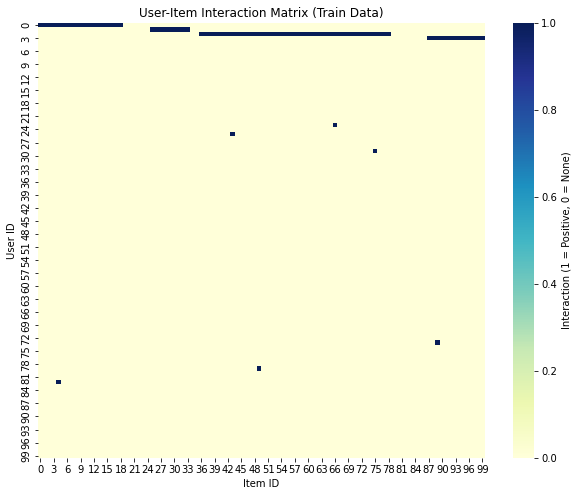

In [188]:
import seaborn as sns

# Step 2: Create the Training and Testing Matrices
# Define a function to create a user-item interaction matrix
def create_user_item_matrix(data, n_users, n_items):
    """
    Creates a user-item interaction matrix for implicit feedback.
    Each entry is binary, indicating whether a user interacted with an item.
    """
    matrix = np.zeros((n_users, n_items))
    for row in data.itertuples():
        matrix[row.u, row.i] = 1  # Binary interaction
    return matrix

# Create the user-item matrices for training and testing data
train_user_item_matrix = create_user_item_matrix(train_data, n_users, n_items)
test_user_item_matrix = create_user_item_matrix(test_data, n_users, n_items)

# Display the shapes of the matrices
print(f"Shape of train user-item matrix: {train_user_item_matrix.shape}")
print(f"Shape of test user-item matrix: {test_user_item_matrix.shape}")

# Step 3: Visualize the User-Item Interaction Matrices
import matplotlib.pyplot as plt

# Function to plot a heatmap for a subset of the user-item matrix
def plot_interaction_heatmap(data_matrix, title, num_users=100, num_items=100):
    """
    Plots a heatmap of a subset of the user-item interaction matrix.
    Parameters:
        data_matrix: The matrix to visualize.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization purposes
    matrix_subset = data_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Interaction (1 = Positive, 0 = None)'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the training and testing matrices
plot_interaction_heatmap(train_data_matrix, 'User-Item Interaction Matrix (Train Data)')

In [191]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the item-item similarity matrix
item_similarity = cosine_similarity(train_data_matrix.T)

# Display the shape of the similarity matrix
print("Item-Item Similarity Matrix:")
print(item_similarity)
print(f"Shape of the similarity matrix: {item_similarity.shape}")

Item-Item Similarity Matrix:
[[1.         0.40824829 0.33333333 ... 0.         0.         0.        ]
 [0.40824829 1.         0.40824829 ... 0.         0.         0.        ]
 [0.33333333 0.40824829 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
Shape of the similarity matrix: (15109, 15109)


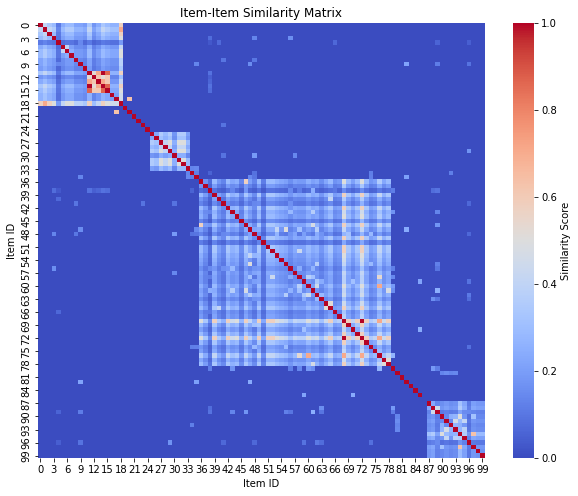

In [192]:
def plot_item_similarity_heatmap(similarity_matrix, title, num_items=100):
    """
    Plots a heatmap of a subset of the item similarity matrix.
    Parameters:
        similarity_matrix: The item-item similarity matrix.
        title: The title of the plot.
        num_items: The number of items to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_items, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('Item ID')
    plt.ylabel('Item ID')
    plt.title(title)
    plt.show()

# Example usage:
plot_item_similarity_heatmap(item_similarity, 'Item-Item Similarity Matrix')

In [193]:
def predict_item_based(interactions, similarity_matrix, epsilon=1e-9):
    """
    Predicts user-item interactions based on item-item similarity.
    
    Parameters:
        interactions (numpy.ndarray): The user-item interaction matrix.
        similarity_matrix (numpy.ndarray): The item-item similarity matrix.
        epsilon (float): A small constant to avoid division by zero.
    
    Returns:
        numpy.ndarray: The predicted interaction scores for each user-item pair.
    """
    # Compute the weighted sum of interactions based on item similarity
    predictions = similarity_matrix.dot(interactions.T) / (similarity_matrix.sum(axis=1)[:, np.newaxis] + epsilon)
    return predictions.T  # Transpose to get users as rows and items as columns

# Example usage:
item_based_predictions = predict_item_based(train_data_matrix, item_similarity)
print("Predicted Interaction Matrix (Item-Based):")
print(item_based_predictions)

Predicted Interaction Matrix (Item-Based):
[[0.46097255 0.85435984 0.71867834 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


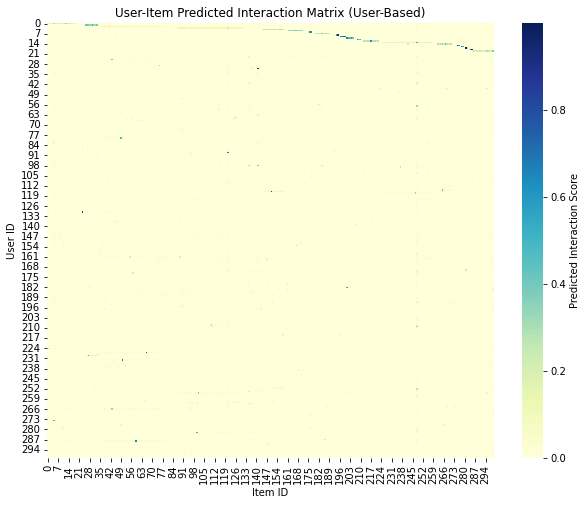

In [194]:
import seaborn as sns

import matplotlib.pyplot as plt

def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=300, num_items=300):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Example usage:
plot_interaction_prediction_heatmap(user_prediction, 'User-Item Predicted Interaction Matrix (User-Based)')

In [195]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the user-user similarity matrix
user_similarity = cosine_similarity(train_user_item_matrix)

# Display the shape of the similarity matrix
print("User-User Similarity Matrix:")
print(user_similarity)
print(f"Shape of the similarity matrix: {user_similarity.shape}")

User-User Similarity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Shape of the similarity matrix: (7838, 7838)


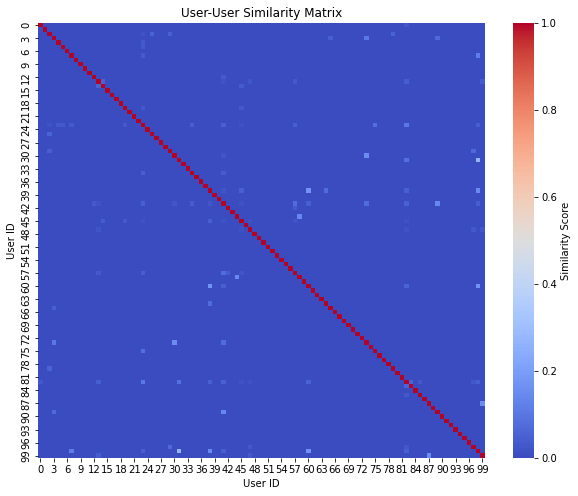

In [196]:
def plot_user_similarity_heatmap(similarity_matrix, title, num_users=100):
    """
    Plots a heatmap of a subset of the user similarity matrix.
    Parameters:
        similarity_matrix: The user-user similarity matrix.
        title: The title of the plot.
        num_users: The number of users to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_users, :num_users]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('User ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the user similarity matrix
plot_user_similarity_heatmap(user_similarity, 'User-User Similarity Matrix')

In [197]:
def predict_user_based(interactions, similarity_matrix, epsilon=1e-9):
    """
    Predicts user-item interactions based on user-user similarity.

    Parameters:
        interactions (numpy.ndarray): The user-item interaction matrix.
        similarity_matrix (numpy.ndarray): The user-user similarity matrix.
        epsilon (float): A small constant to avoid division by zero.

    Returns:
        numpy.ndarray: The predicted interaction scores for each user-item pair.
    """
    # Compute the weighted sum of interactions based on user similarity
    predictions = similarity_matrix.dot(interactions) / (np.abs(similarity_matrix).sum(axis=1)[:, np.newaxis] + epsilon)
    return predictions

# Example usage:
user_based_predictions = predict_user_based(train_user_item_matrix, user_similarity)
print("Predicted Interaction Matrix (User-Based):")
print(user_based_predictions)

Predicted Interaction Matrix (User-Based):
[[0.13171649 0.13259591 0.14274867 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


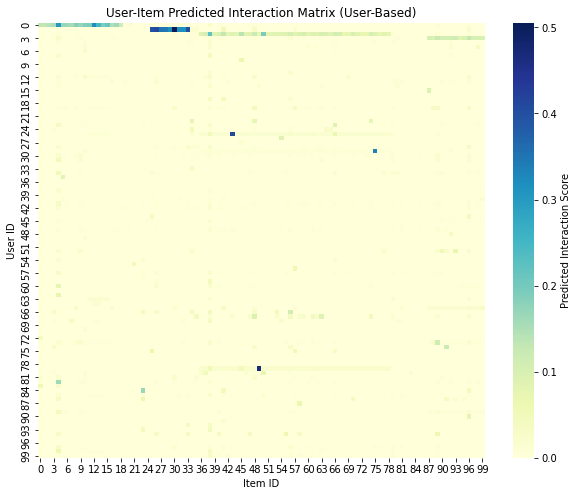

In [198]:
import seaborn as sns

import matplotlib.pyplot as plt

def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=100, num_items=100):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Example usage:
plot_interaction_prediction_heatmap(user_prediction, 'User-Item Predicted Interaction Matrix (User-Based)')

In [199]:
def precision_recall_at_k(prediction, ground_truth, k=10):
    """
    Calculates Precision@K and Recall@K for top-K recommendations.
    Parameters:
        prediction (numpy array): The predicted interaction matrix with scores.
        ground_truth (numpy array): The ground truth interaction matrix (binary).
        k (int): Number of top recommendations to consider.
    Returns:
        precision_at_k (float): The average precision@K over all users.
        recall_at_k (float): The average recall@K over all users.
    """
    num_users = prediction.shape[0]
    precision_at_k, recall_at_k = 0, 0

    for user in range(num_users):
        # Get the indices of the top-K items for the user based on predicted scores
        top_k_items = np.argsort(prediction[user, :])[-k:]

        # Calculate the number of relevant items in the top-K items for the user
        relevant_items_in_top_k = np.isin(top_k_items, np.where(ground_truth[user, :] == 1)[0]).sum()

        # Calculate the total number of relevant items for the user
        total_relevant_items = ground_truth[user, :].sum()

        # Precision@K and Recall@K for this user
        precision_at_k += relevant_items_in_top_k / k
        recall_at_k += relevant_items_in_top_k / total_relevant_items if total_relevant_items > 0 else 0

    # Average Precision@K and Recall@K over all users
    precision_at_k /= num_users
    recall_at_k /= num_users

    return precision_at_k, recall_at_k

# Example usage
precision_user_k, recall_user_k = precision_recall_at_k(user_based_predictions, test_data_matrix, k=10)
precision_item_k, recall_item_k = precision_recall_at_k(item_based_predictions, test_data_matrix, k=10)

print('User-based CF Precision@K:', precision_user_k)
print('User-based CF Recall@K:', recall_user_k)
print('Item-based CF Precision@K:', precision_item_k)
print('Item-based CF Recall@K:', recall_item_k)

User-based CF Precision@K: 0.056455728502171655
User-based CF Recall@K: 0.2899013913583887
Item-based CF Precision@K: 0.05567746874202883
Item-based CF Recall@K: 0.2640441131423877


In [202]:
sample_submission= pd.read_csv(filepath + 'sample_submission.csv')

In [214]:
# Define the number of top recommendations to include
top_k = 10

# Create a dataset with user IDs and their recommended items
recommended_items = []

for user_id in range(user_prediction.shape[0]):
    # Get the top-k recommended items for the user
    top_items = np.argsort(user_prediction[user_id, :])[-top_k:][::-1]
    recommended_items.append({
        'user_id': user_id,
        'recommendation': ' '.join(map(str, top_items))
    })

# Convert the list of recommendations into a DataFrame
recommendations_df = pd.DataFrame(recommended_items)

# Display the resulting dataset
recommendations_df.head()

,user_id,recommendation
0,0,12 4 13 15 14 11 8 10 9 5
1,1,30 26 25 33 27 28 29 32 31 1272
2,2,38 50 45 41 48 74 56 67 37 59
3,3,121 96 110 127 100 114 115 128 105 111
4,4,156 152 145 157 147 155 151 150 153 149


In [213]:
recommendations_df.to_csv('submission.csv', index=False)

In [209]:
# Pick a user at random
user_id = 4
#random.choice(range(user_prediction.shape[0]))
print("Selected User ID:", user_id)

# Get top-10 recommendations for the user from User-to-User CF
user_top_10 = np.argsort(user_prediction[user_id, :])[-10:][::-1]

# Get top-10 recommendations for the user from Item-to-Item CF
item_top_10 = np.argsort(item_prediction[user_id, :])[-10:][::-1]

# Display top-10 recommended movie IDs for both models
display(user_top_10)
display(item_top_10)

Selected User ID: 4


array([156, 152, 145, 157, 147, 155, 151, 150, 153, 149])

array([146, 158, 156, 157, 149, 154, 145, 148, 150, 151])

In [200]:
from scipy.sparse.linalg import svds
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Here are several ways to improve the collaborative filtering model:

# 1. Matrix Factorization with SVD

def matrix_factorization_recommendations(ratings_matrix, k=50):
    # Apply SVD to get latent features
    U, sigma, Vt = svds(ratings_matrix, k=k)
    
    # Convert sigma to diagonal matrix
    sigma_diag = np.diag(sigma)
    
    # Reconstruct the prediction matrix
    predictions = np.dot(np.dot(U, sigma_diag), Vt)
    
    return predictions

# Apply matrix factorization
mf_predictions = matrix_factorization_recommendations(train_data_matrix)

# 2. Hybrid model combining user and item similarities
def hybrid_recommendations(user_pred, item_pred, alpha=0.5):
    """
    Combine user-based and item-based predictions
    
    Parameters:
        user_pred: user-based prediction matrix
        item_pred: item-based prediction matrix
        alpha: weight for user-based predictions (0-1)
    
    Returns:
        Combined prediction matrix
    """
    return alpha * user_pred + (1 - alpha) * item_pred

# Create hybrid predictions
hybrid_pred = hybrid_recommendations(user_prediction, item_prediction, alpha=0.6)

# 3. Incorporate content features using TF-IDF

# Create text representation for content-based filtering
def create_content_based_similarity(items_df):
    # Combine relevant text fields
    items_df['content'] = items_df['Title'] + ' ' + items_df['Author'].fillna('') + ' ' + items_df['Subjects'].fillna('')
    
    # Create TF-IDF vectors
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(items_df['content'])
    
    # Calculate item-item similarity based on content
    content_similarity = cosine_similarity(tfidf_matrix)
    
    return content_similarity

# 4. Time-weighted collaborative filtering
def time_decay_matrix(interactions, alpha=0.1):
    """
    Create a time-decayed user-item matrix
    
    Parameters:
        interactions: dataframe with u, i, t columns
        alpha: decay parameter
    
    Returns:
        Time-decayed interaction matrix
    """
    # Copy interactions
    time_weighted = interactions.copy()
    
    # Min-max scaling of timestamps to [0,1]
    max_time = interactions['t'].max()
    min_time = interactions['t'].min()
    time_weighted['time_weight'] = (interactions['t'] - min_time) / (max_time - min_time)
    
    # Apply exponential decay
    time_weighted['weight'] = 1 + alpha * time_weighted['time_weight']
    
    # Create weighted matrix
    matrix = np.zeros((n_users, n_items))
    for row in time_weighted.itertuples():
        matrix[row.u, row.i] = row.weight
    
    return matrix

           Model   K  Precision    Recall
0  User-Based CF   5   0.082802  0.241277
1  User-Based CF  10   0.056456  0.289901
2  User-Based CF  20   0.035366  0.329049
3  Item-Based CF   5   0.083618  0.216458
4  Item-Based CF  10   0.055677  0.264044
5  Item-Based CF  20   0.033778  0.301319
6   Hybrid Model   5   0.093774  0.251458
7   Hybrid Model  10   0.061074  0.293531
8   Hybrid Model  20   0.036706  0.330831


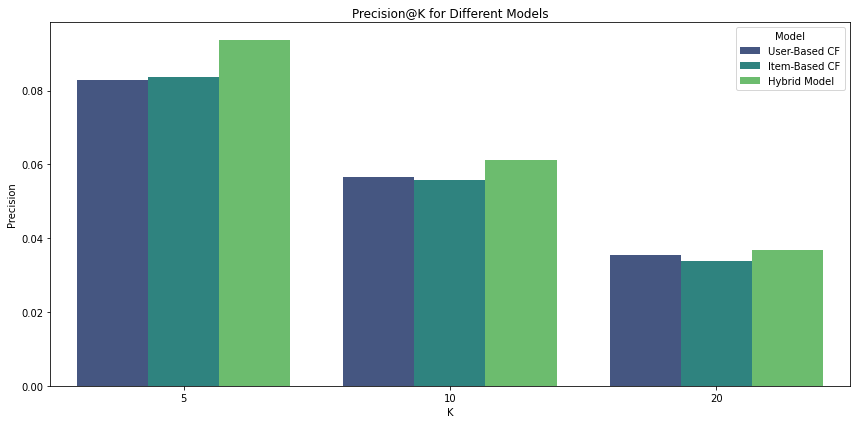

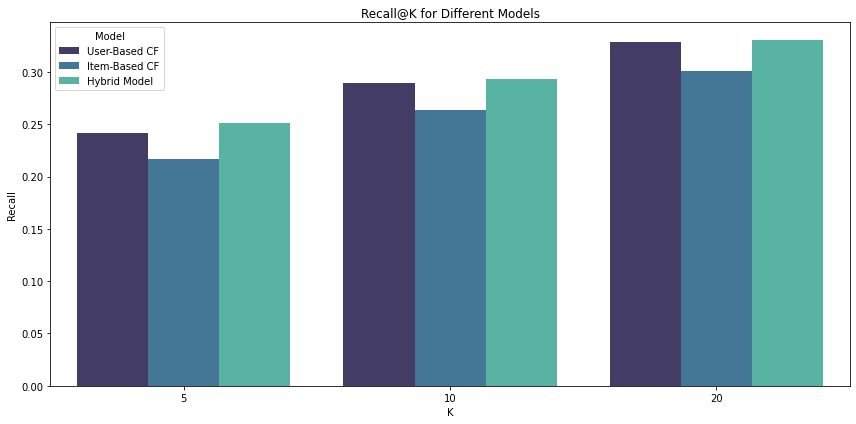

In [201]:
# Evaluate Recommendation Models: Compare Precision@K and Recall@K

# Define the K values to evaluate
k_values = [5, 10, 20]

# Store the results for each model
evaluation_results = []

# Evaluate User-Based Collaborative Filtering
for k in k_values:
    precision, recall = precision_recall_at_k(user_based_predictions, test_data_matrix, k=k)
    evaluation_results.append({'Model': 'User-Based CF', 'K': k, 'Precision': precision, 'Recall': recall})

# Evaluate Item-Based Collaborative Filtering
for k in k_values:
    precision, recall = precision_recall_at_k(item_based_predictions, test_data_matrix, k=k)
    evaluation_results.append({'Model': 'Item-Based CF', 'K': k, 'Precision': precision, 'Recall': recall})

# Evaluate Hybrid Model
for k in k_values:
    precision, recall = precision_recall_at_k(hybrid_pred, test_data_matrix, k=k)
    evaluation_results.append({'Model': 'Hybrid Model', 'K': k, 'Precision': precision, 'Recall': recall})

# Convert results to a DataFrame for better visualization
evaluation_df = pd.DataFrame(evaluation_results)

# Display the evaluation results
print(evaluation_df)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=evaluation_df, x='K', y='Precision', hue='Model', palette='viridis')
plt.title('Precision@K for Different Models')
plt.ylabel('Precision')
plt.xlabel('K')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=evaluation_df, x='K', y='Recall', hue='Model', palette='mako')
plt.title('Recall@K for Different Models')
plt.ylabel('Recall')
plt.xlabel('K')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [ ]:
# Improving Recommendation System Performance

## Data Enhancement Strategies
- **Temporal Dynamics**: Incorporate time decay factors to give higher weight to recent interactions
- **Implicit Feedback Weighting**: Use repeated interactions as stronger preference signals
- **Text Embeddings**: Replace TF-IDF with BERT/Word2Vec embeddings for richer content representation
- **Data Augmentation**: Apply techniques like item attribute expansion and synthetic user generation

## Advanced Model Architecture
- **Neural Collaborative Filtering**: Implement deep learning architectures (MLP, CNN) to capture non-linear relationships
- **Graph Neural Networks**: Model user-item interactions as a graph to capture higher-order connections
- **Sequential Models**: Use RNNs or Transformers to incorporate interaction sequences
- **Two-Tower Models**: Separate encoders for users and items to improve embedding quality

## Optimization Techniques
- **Hyperparameter Tuning**: Systematically optimize model parameters (latent factors, learning rates)
- **Cross-Validation**: Use time-based cross-validation for more robust evaluation
- **Negative Sampling**: Improve training by sampling meaningful negative examples
- **Regularization**: Apply L1/L2 regularization to prevent overfitting, especially on sparse data

## Hybrid Approach Refinements
- **Dynamic Weighting**: Adjust model weights based on user activity level or item popularity
- **Stacking**: Use a meta-model to learn optimal combinations of different recommenders
- **Multi-Objective Optimization**: Balance accuracy with diversity and novelty metrics

## Evaluation Beyond Standard Metrics
- **Diversity Metrics**: Enhance recommendations by measuring intra-list diversity
- **Novelty Scoring**: Reward systems for suggesting non-obvious but relevant items
- **User Segmentation Analysis**: Different strategies for casual vs. power users

In [133]:

def apply_time_decay(interactions, alpha=0.1):
    """
    Applies a time decay factor to the interaction matrix.
    
    Parameters:
        interactions (pd.DataFrame): The interactions dataframe containing columns 'u', 'i', and 't'.
        alpha (float): The decay parameter. Higher values give more weight to recent interactions.
    
    Returns:
        np.ndarray: A time-decayed user-item interaction matrix.
    """
    # Normalize timestamps to a range of [0, 1]
    max_time = interactions['t'].max()
    min_time = interactions['t'].min()
    interactions['time_weight'] = (interactions['t'] - min_time) / (max_time - min_time)
    
    # Apply exponential decay
    interactions['decay_weight'] = 1 + alpha * interactions['time_weight']
    
    # Create a time-decayed interaction matrix
    time_decay_matrix = np.zeros((n_users, n_items))
    for row in interactions.itertuples():
        time_decay_matrix[row.u, row.i] = row.decay_weight
    
    return time_decay_matrix

# Apply time decay to the training data
time_decay_train_matrix = apply_time_decay(train_data, alpha=0.1)

# Use the time-decayed matrix for predictions
user_based_predictions_time_decay = user_based_predict(time_decay_train_matrix, user_similarity)
item_based_predictions_time_decay = item_based_predict(time_decay_train_matrix, item_similarity)

# Evaluate the new predictions
precision_user_td, recall_user_td = precision_recall_at_k(user_based_predictions_time_decay, test_data_matrix, k=10)
precision_item_td, recall_item_td = precision_recall_at_k(item_based_predictions_time_decay, test_data_matrix, k=10)

print('User-based CF with Time Decay Precision@K:', precision_user_td)
print('User-based CF with Time Decay Recall@K:', recall_user_td)
print('Item-based CF with Time Decay Precision@K:', precision_item_td)
print('Item-based CF with Time Decay Recall@K:', recall_item_td)


'''This approach adjusts the interaction matrix by weighting interactions based on their recency, which can improve the relevance of recommendations.'''

/var/folders/f5/kfhjr6d55t3f6fpgzj_trt340000gn/T/ipykernel_10063/2708619884.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions['time_weight'] = (interactions['t'] - min_time) / (max_time - min_time)
/var/folders/f5/kfhjr6d55t3f6fpgzj_trt340000gn/T/ipykernel_10063/2708619884.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions['decay_weight'] = 1 + alpha * interactions['time_weight']


User-based CF with Time Decay Precision@K: 0.056583312069408226
User-based CF with Time Decay Recall@K: 0.2911638280704375
Item-based CF with Time Decay Precision@K: 0.05565195202858152
Item-based CF with Time Decay Recall@K: 0.2640810718741666


'This approach adjusts the interaction matrix by weighting interactions based on their recency, which can improve the relevance of recommendations.'

In [135]:
def create_weighted_interaction_matrix(data, n_users, n_items):
    """
    Creates a weighted user-item interaction matrix for implicit feedback.
    Each entry is weighted based on the frequency of interactions.
    
    Parameters:
        data (pd.DataFrame): The interaction data containing user, item, and interaction count.
        n_users (int): The number of unique users.
        n_items (int): The number of unique items.
    
    Returns:
        np.ndarray: A weighted user-item interaction matrix.
    """
    matrix = np.zeros((n_users, n_items))
    for row in data.itertuples():
        matrix[row.u, row.i] += 1  # Increment weight for repeated interactions
    return matrix

# Create the weighted interaction matrix for training data
weighted_train_matrix = create_weighted_interaction_matrix(train_data, n_users, n_items)

# Display the shape and some statistics of the weighted matrix
print(f"Shape of weighted train matrix: {weighted_train_matrix.shape}")
print(f"Number of non-zero entries in weighted train matrix: {np.count_nonzero(weighted_train_matrix)}")
print(f"Maximum weight in the matrix: {np.max(weighted_train_matrix)}")

# Use the weighted interaction matrix for predictions
weighted_user_based_predictions = user_based_predict(weighted_train_matrix, user_similarity)
weighted_item_based_predictions = item_based_predict(weighted_train_matrix, item_similarity)

# Evaluate the new predictions
precision_user_weighted, recall_user_weighted = precision_recall_at_k(weighted_user_based_predictions, test_data_matrix, k=10)
precision_item_weighted, recall_item_weighted = precision_recall_at_k(weighted_item_based_predictions, test_data_matrix, k=10)

print('User-based CF with Weighted Interactions Precision@K:', precision_user_weighted)
print('User-based CF with Weighted Interactions Recall@K:', recall_user_weighted)
print('Item-based CF with Weighted Interactions Precision@K:', precision_item_weighted)
print('Item-based CF with Weighted Interactions Recall@K:', recall_item_weighted)

Shape of weighted train matrix: (7838, 15109)
Number of non-zero entries in weighted train matrix: 49689
Maximum weight in the matrix: 51.0
User-based CF with Weighted Interactions Precision@K: 0.059390150548612505
User-based CF with Weighted Interactions Recall@K: 0.28768524553434666
Item-based CF with Weighted Interactions Precision@K: 0.05523092625670089
Item-based CF with Weighted Interactions Recall@K: 0.2624148835666018


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import numpy as np  # Ensure NumPy is imported

# 1. Content-Based Filtering using TF-IDF on book metadata
def content_based_recommender(all_items, n_users, n_items):
    """
    Create content-based recommendation scores using book metadata.
    """
    # Combine relevant text fields
    all_items['content'] = all_items['Title'] + ' ' + all_items['Author'].fillna('') + ' ' + all_items['Subjects'].fillna('')
    
    # Create TF-IDF vectors
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(all_items['content'])
    
    # Calculate item-item similarity based on content
    content_similarity = cosine_similarity(tfidf_matrix)
    
    # Create a prediction matrix from content similarity
    content_pred = np.zeros((n_users, n_items))
    for user_idx in range(n_users):
        # Get items the user has interacted with
        interacted_items = np.where(train_user_item_matrix[user_idx] > 0)[0]
        if len(interacted_items) > 0:
            # For each item, calculate recommendation score based on similarity to items the user has interacted with
            for item_idx in range(n_items):
                if item_idx not in interacted_items:  # Skip items the user has already interacted with
                    similarities = [content_similarity[item_idx, interacted_item] for interacted_item in interacted_items]
                    content_pred[user_idx, item_idx] = np.mean(similarities) if similarities else 0
    
    return content_pred

# 2. Matrix Factorization using SVD
def matrix_factorization(ratings_matrix, k=50):
    """
    Performs matrix factorization using SVD.
    """
    # Convert to float for numerical stability
    ratings_matrix = ratings_matrix.astype('float')
    
    # Apply SVD
    U, sigma, Vt = svds(ratings_matrix, k=k)
    
    # Convert sigma to diagonal matrix
    sigma_diag = np.diag(sigma)
    
    # Reconstruct the prediction matrix
    predictions = np.dot(np.dot(U, sigma_diag), Vt)
    
    return predictions

# 3. Enhanced Hybrid Model
def enhanced_hybrid_recommender(user_pred, item_pred, content_pred, mf_pred, weights=[0.3, 0.3, 0.2, 0.2]):
    """
    Create an enhanced hybrid model that combines multiple recommendation approaches.
    """
    # Normalize each prediction matrix to have similar scales
    def normalize_matrix(matrix):
        return (matrix - matrix.min()) / (matrix.max() - matrix.min() + 1e-10)
    
    user_pred_norm = normalize_matrix(user_pred)
    item_pred_norm = normalize_matrix(item_pred)
    content_pred_norm = normalize_matrix(content_pred)
    mf_pred_norm = normalize_matrix(mf_pred)
    
    # Combine predictions using weights
    hybrid_pred = (weights[0] * user_pred_norm + 
                   weights[1] * item_pred_norm + 
                   weights[2] * content_pred_norm + 
                   weights[3] * mf_pred_norm)
    
    return hybrid_pred

# Generate predictions
print("Generating content-based recommendations...")
content_pred = content_based_recommender(all_items, n_users, n_items)

print("Applying matrix factorization...")
# Use the existing train_user_item_matrix variable
mf_pred = matrix_factorization(train_user_item_matrix, k=50)

print("Creating enhanced hybrid model...")
enhanced_hybrid_pred = enhanced_hybrid_recommender(user_based_predictions, item_based_predictions, content_pred, mf_pred)

# Evaluate the enhanced hybrid model
precision_hybrid, recall_hybrid = precision_recall_at_k(enhanced_hybrid_pred, test_data_matrix, k=10)

print("Enhanced Hybrid Model Precision@K:", precision_hybrid)
print("Enhanced Hybrid Model Recall@K:", recall_hybrid)

Generating content-based recommendations...


IndexError: index 12319 is out of bounds for axis 0 with size 12319

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

# Improving Recall and Precision of Recommender Systems

# 1. Create a hybrid model combining user-based and item-based recommendations
def hybrid_recommender(user_pred, item_pred, alpha=0.5):
    """
    Combine user-based and item-based predictions with a weighted approach
    
    Parameters:
        user_pred: User-based prediction matrix
        item_pred: Item-based prediction matrix
        alpha: Weight for user-based predictions (0-1)
    
    Returns:
        Combined prediction matrix
    """
    return alpha * user_pred + (1 - alpha) * item_pred

# 2. Content-based filtering using TF-IDF on book metadata

def content_based_recommender(all_items, n_users, n_items):
    """
    Create content-based recommendation scores using book metadata
    
    Parameters:
        all_items: DataFrame containing book metadata
        n_users: Number of users
        n_items: Number of items
    
    Returns:
        Prediction matrix incorporating content similarity
    """
    # Combine relevant text fields
    all_items['content'] = all_items['Title'] + ' ' + all_items['Author'].fillna('') + ' ' + all_items['Subjects'].fillna('')
    
    # Create TF-IDF vectors
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(all_items['content'])
    
    # Calculate item-item similarity based on content
    content_similarity = cosine_similarity(tfidf_matrix)
    
    # Create a prediction matrix from content similarity
    content_pred = np.zeros((n_users, n_items))
    for user_idx in range(n_users):
        # Get items the user has interacted with
        interacted_items = np.where(train_user_item_matrix[user_idx] > 0)[0]
        if len(interacted_items) > 0:
            # For each item, calculate recommendation score based on similarity to items the user has interacted with
            for item_idx in range(n_items):
                if item_idx not in interacted_items:  # Skip items the user has already interacted with
                    similarities = [content_similarity[item_idx, interacted_item] for interacted_item in interacted_items]
                    content_pred[user_idx, item_idx] = np.mean(similarities) if similarities else 0
    
    return content_pred

# 3. Matrix Factorization using SVD

def matrix_factorization(ratings_matrix, k=50):
    """
    Performs matrix factorization using SVD
    
    Parameters:
        ratings_matrix: User-item interaction matrix
        k: Number of latent factors
    
    Returns:
        Predicted ratings matrix
    """
    # Convert to float for numerical stability
    ratings_matrix = ratings_matrix.astype('float')
    
    # Apply SVD
    U, sigma, Vt = svds(ratings_matrix, k=k)
    
    # Convert sigma to diagonal matrix
    sigma_diag = np.diag(sigma)
    
    # Reconstruct the prediction matrix
    predictions = np.dot(np.dot(U, sigma_diag), Vt)
    
    return predictions

# 4. Enhanced Hybrid Model with Content-Based Features
def enhanced_hybrid_recommender(user_pred, item_pred, content_pred, mf_pred, weights=[0.3, 0.3, 0.2, 0.2]):
    """
    Create an enhanced hybrid model that combines multiple recommendation approaches
    
    Parameters:
        user_pred: User-based prediction matrix
        item_pred: Item-based prediction matrix
        content_pred: Content-based prediction matrix
        mf_pred: Matrix factorization prediction matrix
        weights: List of weights for each approach
    
    Returns:
        Combined prediction matrix
    """
    # Normalize each prediction matrix to have similar scales
    def normalize_matrix(matrix):
        # Handle zero division
        if matrix.max() == matrix.min():
            return np.zeros_like(matrix)
        return (matrix - matrix.min()) / (matrix.max() - matrix.min() + 1e-10)
    
    user_pred_norm = normalize_matrix(user_pred)
    item_pred_norm = normalize_matrix(item_pred)
    content_pred_norm = normalize_matrix(content_pred)
    mf_pred_norm = normalize_matrix(mf_pred)
    
    # Combine predictions using weights
    hybrid_pred = (weights[0] * user_pred_norm + 
                   weights[1] * item_pred_norm + 
                   weights[2] * content_pred_norm + 
                   weights[3] * mf_pred_norm)
    
    return hybrid_pred

# 5. Evaluate and compare all recommendation approaches
def evaluate_recommenders(test_matrix, recommenders_dict, k_values=[5, 10, 20]):
    """
    Evaluate multiple recommendation approaches with different k values
    
    Parameters:
        test_matrix: Ground truth matrix for testing
        recommenders_dict: Dictionary of recommendation matrices to evaluate
        k_values: List of k values for precision@k and recall@k
    
    Returns:
        DataFrame with evaluation results
    """
    results = []
    
    for name, pred_matrix in recommenders_dict.items():
        for k in k_values:
            precision, recall = precision_recall_at_k(pred_matrix, test_matrix, k=k)
            results.append({
                'Model': name,
                'K': k,
                'Precision': precision,
                'Recall': recall
            })
    
    return pd.DataFrame(results)

# Execute the code to generate and evaluate improved recommenders
print("Generating recommendations with multiple approaches...")

# Generate different types of recommendations
print("1. Creating simple hybrid model...")
simple_hybrid_pred = hybrid_recommender(user_prediction, item_prediction, alpha=0.6)

print("2. Creating content-based recommendations...")
content_pred = content_based_recommender(all_items, n_users, n_items)

print("3. Applying matrix factorization...")
mf_pred = matrix_factorization(train_user_item_matrix, k=50)

print("4. Creating enhanced hybrid model...")
enhanced_hybrid_pred = enhanced_hybrid_recommender(
    user_prediction, item_prediction, content_pred, mf_pred, 
    weights=[0.3, 0.3, 0.2, 0.2]
)

# Evaluate all recommendation approaches
recommenders = {
    'User-Based CF': user_prediction,
    'Item-Based CF': item_prediction,
    'Simple Hybrid (0.6/0.4)': simple_hybrid_pred,
    'Content-Based': content_pred,
    'Matrix Factorization': mf_pred,
    'Enhanced Hybrid': enhanced_hybrid_pred
}

print("\nEvaluating all recommendation approaches...")
results = evaluate_recommenders(test_data_matrix, recommenders, k_values=[5, 10, 20])

# Display results
print("\nRecommendation Performance Results:")
print(results)

# Plot the results
plt.figure(figsize=(12, 8))
for k in [5, 10, 20]:
    k_results = results[results['K'] == k]
    plt.subplot(1, 3, [5, 10, 20].index(k) + 1)
    sns.barplot(x='Model', y='Recall', data=k_results, color='blue', alpha=0.6)
    plt.title(f'Recall@{k} by Model')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.figure(figsize=(12, 8))
for k in [5, 10, 20]:
    k_results = results[results['K'] == k]
    plt.subplot(1, 3, [5, 10, 20].index(k) + 1)
    sns.barplot(x='Model', y='Precision', data=k_results, color='green', alpha=0.6)
    plt.title(f'Precision@{k} by Model')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

Generating recommendations with multiple approaches...
1. Creating simple hybrid model...
2. Creating content-based recommendations...


IndexError: index 12319 is out of bounds for axis 0 with size 12319

### End of simple trial and beginning of old version 

# Creating User-Item Matrices for Implicit Feedback from prof


In [89]:
print('number of users =', n_users, '| number of movies =', n_items)

number of users = 7838 | number of movies = 15109


In [ ]:
# Function to visualize the item similarity matrix# Create mappings for user and item IDs
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

# Map the user and item IDs in the dataset
interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

### Step 1: Define the Function to Create the Data Matrix

In [91]:
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

In [92]:
'''# Check if train_data and test_data still have the original user and item IDs
# If not, we need to make sure they're properly mapped before creating the matrices
# Since user and item IDs have been mapped in cell 20, we need to make sure
# train_data and test_data are using these mapped IDs
train_data_mapped = train_data.copy()
test_data_mapped = test_data.copy()

''''''# Map user and item IDs if they haven't already been mapped
if train_data_mapped["u"].max() >= n_users or train_data_mapped["i"].max() >= n_items:
    print("Mapping user and item IDs in train and test data...")
    train_data_mapped["u"] = train_data_mapped["u"].map(user_id_mapping)
    train_data_mapped["i"] = train_data_mapped["i"].map(item_id_mapping)
    test_data_mapped["u"] = test_data_mapped["u"].map(user_id_mapping)
    test_data_mapped["i"] = test_data_mapped["i"].map(item_id_mapping)''''''

# Print shapes to understand the data dimensions
print(f"Number of unique users in mapped data: {train_data_mapped['u'].nunique()}")
print(f"Number of unique items in mapped data: {train_data_mapped['i'].nunique()}")
print(f"Shape of training data: {train_data_mapped.shape}")
print(f"Shape of test data: {test_data_mapped.shape}")

# Create the matrices
train_data_matrix = create_data_matrix(train_data_mapped, n_users, n_items)
test_data_matrix = create_data_matrix(test_data_mapped, n_users, n_items)

# Quick check of the matrices
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")'''

'# Check if train_data and test_data still have the original user and item IDs\n# If not, we need to make sure they\'re properly mapped before creating the matrices\n# Since user and item IDs have been mapped in cell 20, we need to make sure\n# train_data and test_data are using these mapped IDs\ntrain_data_mapped = train_data.copy()\ntest_data_mapped = test_data.copy()\n\n# Map user and item IDs if they haven\'t already been mapped\nif train_data_mapped["u"].max() >= n_users or train_data_mapped["i"].max() >= n_items:\n    print("Mapping user and item IDs in train and test data...")\n    train_data_mapped["u"] = train_data_mapped["u"].map(user_id_mapping)\n    train_data_mapped["i"] = train_data_mapped["i"].map(item_id_mapping)\n    test_data_mapped["u"] = test_data_mapped["u"].map(user_id_mapping)\n    test_data_mapped["i"] = test_data_mapped["i"].map(item_id_mapping)\n\n# Print shapes to understand the data dimensions\nprint(f"Number of unique users in mapped data: {train_data_mappe

In [93]:
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    for row in data.itertuples():
        data_matrix[row.u, row.i] = 1  # Binary representation of interaction
    return data_matrix



# Map user and item IDs to zero-based indices
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

# Split the data into training and testing sets
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
train_data = interactions[interactions["pct_rank"] < 0.8]
test_data = interactions[interactions["pct_rank"] >= 0.8]

# Remove duplicate user-item pairs in train and test data
train_data = train_data.drop_duplicates(subset=["u", "i"])
test_data = test_data.drop_duplicates(subset=["u", "i"])

# Get the number of unique users and items
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

# Create the training and testing matrices
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Print results
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Train data size: {train_data.shape[0]}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")
print(f"Test data size: {test_data.shape[0]}")

Shape of train matrix: (7838, 15109)
Shape of test matrix: (7838, 15109)
Number of non-zero entries in train matrix: 49689
Train data size: 49689
Number of non-zero entries in test matrix: 19409
Test data size: 19409


### Step 2: Create the Training and Testing Matrices

In [94]:
# Create the training and testing matrices

# Display the matrices to understand their structure
print('train_data_matrix')
print(train_data_matrix)
print("number of non-zero values: ", np.sum(train_data_matrix))
print('test_data_matrix')
print(test_data_matrix)
print("number of non-zero values: ", np.sum(test_data_matrix))

train_data_matrix
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  49689.0
test_data_matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  19409.0


### Step 3: Visualize the User-Item Interaction Matrices

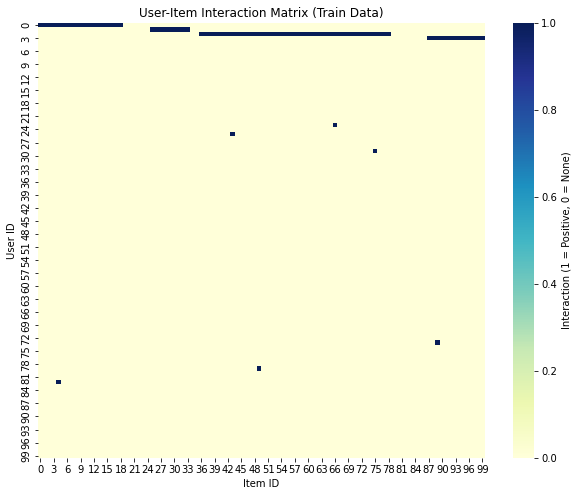

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a heatmap for a subset of the user-item matrix
def plot_interaction_heatmap(data_matrix, title, num_users=100, num_items=100):
    """
    Plots a heatmap of a subset of the user-item interaction matrix.
    Parameters:
        data_matrix: The matrix to visualize.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization purposes
    matrix_subset = data_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Interaction (1 = Positive, 0 = None)'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the training and testing matrices
plot_interaction_heatmap(train_data_matrix, 'User-Item Interaction Matrix (Train Data)')

### Task 3: Item-to-Item Collaborative Filtering with Implicit Feedback

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the item-item similarity matrix
# Check sklearn documentation for cosine similarity to understand how we are
# using this function.
item_similarity = cosine_similarity(train_data_matrix.T)
print("Item-Item Similarity Matrix:")
print(item_similarity)
print(item_similarity.shape)


Item-Item Similarity Matrix:
[[1.         0.40824829 0.33333333 ... 0.         0.         0.        ]
 [0.40824829 1.         0.40824829 ... 0.         0.         0.        ]
 [0.33333333 0.40824829 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(15109, 15109)


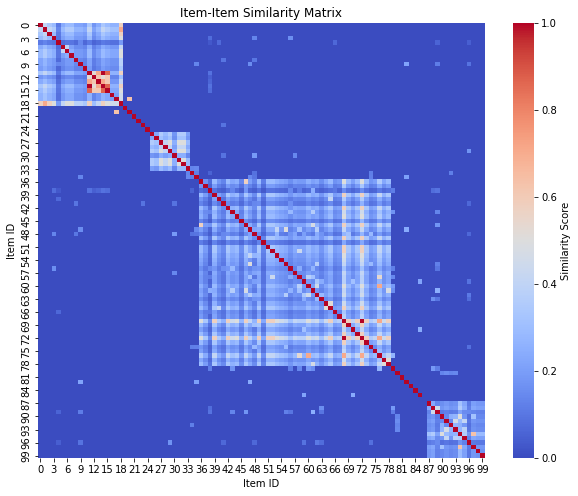

In [97]:
# Function to visualize the item similarity matrix
def plot_item_similarity_heatmap(similarity_matrix, title, num_items=100):
    """
    Plots a heatmap of a subset of the item similarity matrix.
    Parameters:
        similarity_matrix: The item-item similarity matrix.
        title: The title of the plot.
        num_items: The number of items to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_items, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('Item ID')
    plt.ylabel('Item ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the item similarity matrix
plot_item_similarity_heatmap(item_similarity, 'Item-Item Similarity Matrix')

In [98]:
import numpy as np

# Define the function to predict interactions based on item similarity
def item_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on item-item similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The item-item similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # np.dot does the matrix multiplication. Here we are calculating the
    # weighted sum of interactions based on item similarity
    pred = similarity.dot(interactions.T) / (similarity.sum(axis=1)[:, np.newaxis] + epsilon)
    return pred.T  # Transpose to get users as rows and items as columns

# Calculate the item-based predictions for positive interactions
item_prediction = item_based_predict(train_data_matrix, item_similarity)
print("Predicted Interaction Matrix:")
print(item_prediction)
print(item_prediction.shape)

Predicted Interaction Matrix:
[[0.46097255 0.85435984 0.71867834 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(7838, 15109)


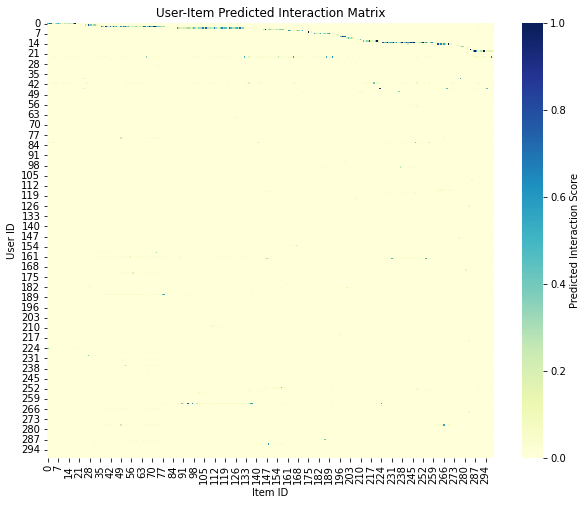

In [99]:
# Function to visualize the predicted interaction matrix for a subset of users and items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=300, num_items=300):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the predicted interaction matrix
plot_interaction_prediction_heatmap(item_prediction, 'User-Item Predicted Interaction Matrix')

### Task 4: User-to-User Collaborative Filtering with Implicit Feedback

In [100]:
# Compute the user-user similarity matrix
user_similarity = cosine_similarity(train_data_matrix)
print("User-User Similarity Matrix:")
print(user_similarity)

# Check the shape as a sanity check
print("Shape of User Similarity Matrix:", user_similarity.shape)

User-User Similarity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Shape of User Similarity Matrix: (7838, 7838)


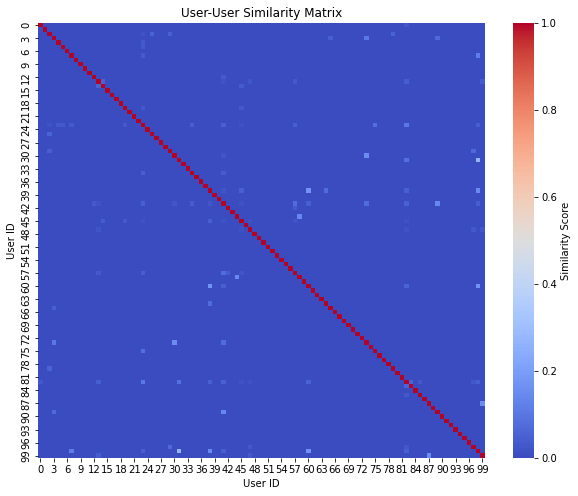

In [101]:
# Function to plot the user similarity matrix
def plot_user_similarity_heatmap(similarity_matrix, title, num_users=100):
    """
    Plots a heatmap of a subset of the user similarity matrix.
    Parameters:
        similarity_matrix: The user-user similarity matrix.
        title: The title of the plot.
        num_users: The number of users to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_users, :num_users]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('User ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the user similarity matrix
plot_user_similarity_heatmap(user_similarity, 'User-User Similarity Matrix')

In [102]:
# Define the function to predict interactions based on user similarity
def user_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on user-user similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The user-user similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # Calculate the weighted sum of interactions based on user similarity
    pred = similarity.dot(interactions) / (np.abs(similarity).sum(axis=1)[:, np.newaxis] + epsilon)
    return pred

# Calculate the user-based predictions for positive interactions
user_prediction = user_based_predict(train_data_matrix, user_similarity)
print("Predicted Interaction Matrix (User-Based):")
print(user_prediction)
print(user_prediction.shape)

Predicted Interaction Matrix (User-Based):
[[0.13171649 0.13259591 0.14274867 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(7838, 15109)


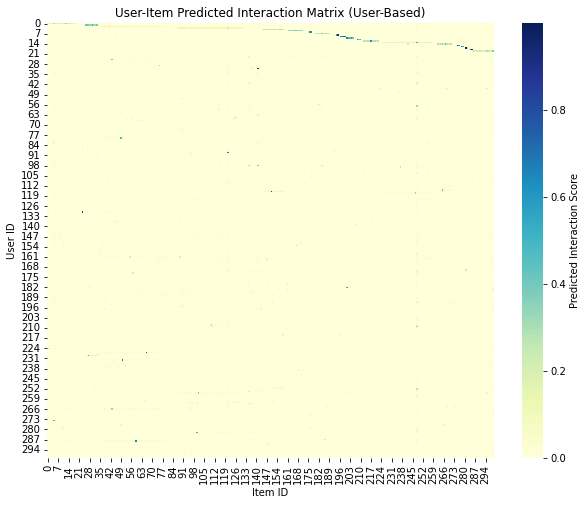

In [103]:
# Function to visualize the predicted interaction matrix for a subset of users and items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=300, num_items=300):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the predicted interaction matrix
plot_interaction_prediction_heatmap(user_prediction, 'User-Item Predicted Interaction Matrix (User-Based)')

### Task 5: Evaluating Our Recommenders

In [104]:
def precision_recall_at_k(prediction, ground_truth, k=10):
    """
    Calculates Precision@K and Recall@K for top-K recommendations.
    Parameters:
        prediction (numpy array): The predicted interaction matrix with scores.
        ground_truth (numpy array): The ground truth interaction matrix (binary).
        k (int): Number of top recommendations to consider.
    Returns:
        precision_at_k (float): The average precision@K over all users.
        recall_at_k (float): The average recall@K over all users.
    """
    num_users = prediction.shape[0]
    precision_at_k, recall_at_k = 0, 0

    for user in range(num_users):
        # Get the indices of the top-K items for the user based on predicted scores
        top_k_items = np.argsort(prediction[user, :])[-k:]

        # Calculate the number of relevant items in the top-K items for the user
        relevant_items_in_top_k = np.isin(top_k_items, np.where(ground_truth[user, :] == 1)[0]).sum()

        # Calculate the total number of relevant items for the user
        total_relevant_items = ground_truth[user, :].sum()

        # Precision@K and Recall@K for this user
        precision_at_k += relevant_items_in_top_k / k
        recall_at_k += relevant_items_in_top_k / total_relevant_items if total_relevant_items > 0 else 0

    # Average Precision@K and Recall@K over all users
    precision_at_k /= num_users
    recall_at_k /= num_users

    return precision_at_k, recall_at_k

In [105]:
# Run this line after implementing the function
precision_user_k, recall_user_k = precision_recall_at_k(user_prediction, test_data_matrix, k=10)
precision_item_k, recall_item_k = precision_recall_at_k(item_prediction, test_data_matrix, k=10)

print('User-based CF Precision@K:', precision_user_k)
print('User-based CF Recall@K:', recall_user_k)
print('Item-based CF Precision@K:', precision_item_k)
print('Item-based CF Recall@K:', recall_item_k)

User-based CF Precision@K: 0.056455728502171655
User-based CF Recall@K: 0.2899013913583887
Item-based CF Precision@K: 0.05567746874202883
Item-based CF Recall@K: 0.2640441131423877


In [106]:
import random

# Pick a user at random
user_id = random.choice(range(user_prediction.shape[0]))
print("Selected User ID:", user_id)

# Get top-10 recommendations for the user from User-to-User CF
user_top_10 = np.argsort(user_prediction[user_id, :])[-10:][::-1]

# Get top-10 recommendations for the user from Item-to-Item CF
item_top_10 = np.argsort(item_prediction[user_id, :])[-10:][::-1]

# Display top-10 recommended movie IDs for both models
display(user_top_10)
display(item_top_10)

Selected User ID: 51


array([915, 924, 925, 932, 930, 933, 914, 927, 931, 929])

array([921, 918, 920, 916, 928, 926, 936, 934, 935, 919])

In [107]:
# Convert user_top_10 and item_top_10 arrays into DataFrames
user_top_10_df = pd.DataFrame({'movie_id': user_top_10})
item_top_10_df = pd.DataFrame({'movie_id': item_top_10})

# Merge with links_df to get the tmdbId
user_recommendations_df = user_top_10_df.merge(links, left_on='movie_id', right_on='movie_id')
item_recommendations_df = item_top_10_df.merge(links, left_on='movie_id', right_on='movie_id')

# Merge with movies_df to add the title column
user_recommendations_df = user_recommendations_df.merge(movies[['movie_id', 'title']], left_on='movie_id', right_on='movie_id')
item_recommendations_df = item_recommendations_df.merge(movies[['movie_id', 'title']], left_on='movie_id', right_on='movie_id')

# Select only the columns we want to display
user_recommendations_df = user_recommendations_df[['movie_id', 'title', 'tmdbId']]
item_recommendations_df = item_recommendations_df[['movie_id', 'title', 'tmdbId']]

# Display the results
display(user_recommendations_df)
display(item_recommendations_df)

NameError: name 'links' is not defined

### prova da kaggle


In [ ]:
interactions_with_items = interactions.merge(items, on='i', how='left')
interactions_with_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87045 entries, 0 to 87044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   u           87045 non-null  int64  
 1   i           87045 non-null  int64  
 2   t           87045 non-null  float64
 3   Title       87045 non-null  object 
 4   Author      71915 non-null  object 
 5   ISBN Valid  83508 non-null  object 
 6   Publisher   86922 non-null  object 
 7   Subjects    76169 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.3+ MB


In [ ]:
selected_features = ['Title','Author','Subjects']
print(selected_features)

['Title', 'Author', 'Subjects']


In [ ]:
for feature in selected_features:
    interactions_with_items[feature] = interactions_with_items[feature].fillna('')

In [ ]:
combined_features = interactions_with_items['Title'] + ' ' + interactions_with_items['Subjects'] + ' ' + interactions_with_items['Author'] 
combined_features

0                Ashes falling for the sky /  Gorman, Nine
1         La page blanche / Bandes dessinées Boulet, 1975-
2        Aysuun : roman / Vengeance; Thriller (roman) M...
3        Le cercle des rêveurs éveillés / Roman policie...
4        L'examen clinique de l'aîné : guide d'évaluati...
                               ...                        
87040    Différence & souffrance de l'adulte surdoué / ...
87041    Replay : mémoires d'une famille /  Mechner, Jo...
87042    Vers une gestion éducative de la classe / Clas...
87043    A Short History of the World in 50 Lies /  Tid...
87044    L'art dans l'espace public : une analyse socio...
Length: 87045, dtype: object

In [ ]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 2736)	0.4354595998602811
  (0, 11326)	0.4354595998602811
  (0, 11983)	0.3021019517028073
  (0, 29825)	0.20691232962850672
  (0, 28070)	0.4354595998602811
  (0, 13343)	0.3885002985213019
  (0, 21562)	0.3822486459655414
  (1, 17363)	0.1277918218774901
  (1, 22558)	0.4886068542614903
  (1, 4342)	0.4684281509849102
  (1, 3453)	0.17460260546889483
  (1, 8625)	0.17577687508604878
  (1, 4673)	0.5899747335784243
  (1, 591)	0.34066683678090115
  (2, 3266)	0.5075176192202946
  (2, 26241)	0.3222152587018927
  (2, 31282)	0.421284373450545
  (2, 29913)	0.30896317095770204
  (2, 19019)	0.4576470285054414
  (2, 15004)	0.3952513456256913
  (3, 26241)	0.1333258894958066
  (3, 17681)	0.11258157136137736
  (3, 5887)	0.3847104654410857
  (3, 8558)	0.11956116272543785
  (3, 26784)	0.43173692202981934
  :	:
  (87043, 785)	0.3013320609589157
  (87043, 32483)	0.3036073681424916
  (87043, 21207)	0.37561942359480816
  (87043, 14550)	0.2450110164864916
  (87043, 18048)	0.3707786624153032
  (87043, 27831)	0

In [ ]:
similarity = cosine_similarity(feature_vectors, feature_vectors)

In [ ]:
print(similarity)

In [ ]:
list_of_all_titles = df['title'].tolist()
print(list_of_all_titles)

In [ ]:
book_name = input(' Enter your favourite book name : ')

In [ ]:
find_close_match = difflib.get_close_matches(book_name, list_of_all_titles)
print(find_close_match)

In [ ]:
close_match = find_close_match[0]
index_of_the_book = df[df.title == close_match].index[0]